In [95]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [96]:
X = 6 * np.random.rand(200,1) - 3
y = 2.8 + X**2 + 0.9* X + np.random.randn(200,1)

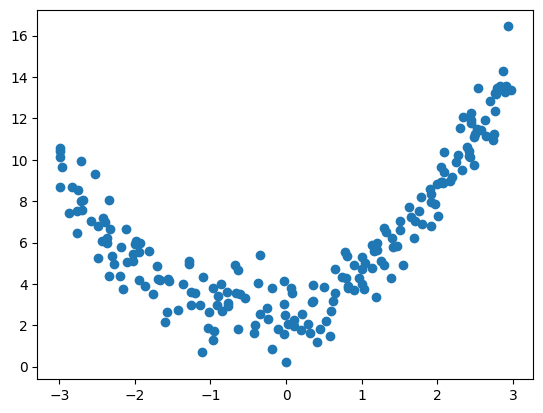

In [97]:
plt.scatter(X,y)

plt.show()

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [99]:
lr = LinearRegression()
lr.fit(X_train, y_train)

pred = lr.predict(X_test)
r2_score(y_test, pred)

0.1378265481639147

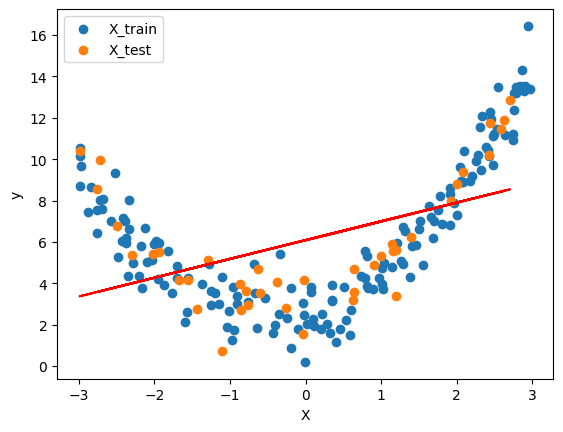

In [100]:
plt.scatter(X_train, y_train, label='X_train')
plt.scatter(X_test, y_test, label='X_test')
plt.plot(X_test, pred, color="red")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [110]:
poly = PolynomialFeatures(degree = 3)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [111]:
print(X_train[0])
print(X_train_trans[0])

[0.3538507]
[1.         0.3538507  0.12521032 0.04430576]


In [112]:
lr2 = LinearRegression()
lr2.fit(X_train_trans, y_train)

pred2 = lr2.predict(X_test_trans)
r2_score(y_test, pred2)

0.8903773173522307

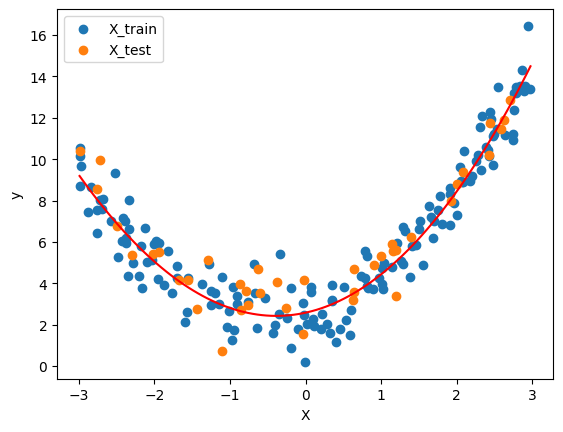

In [113]:
X_range = np.linspace(min(X), max(X), 100).reshape(-1, 1)
X_range_trans = poly.transform(X_range)
pred_range = lr2.predict(X_range_trans)
plt.scatter(X_train, y_train, label='X_train')
plt.scatter(X_test, y_test, label='X_test')
plt.plot(X_range, pred_range, color="red")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()